# ANALYSIS AND INSIGHTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Automcompletar rápido
%config IPCompleter.greedy=True

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_pickle('C:/Users/sagar/Semester 3(FOM)/Daily/ecommerce-optimisation-main/Datos/tablon_analitico.pickle')
df

,user_id,user_session,category_id,date,product_id,price,event_type,year,month,day,hour,minute,second,festivo,black_friday,san_valentin
event_time,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,2019-10-01,5843665,9.44,view,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,2019-10-01,5868461,3.57,cart,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,2019-10-01,5877456,122.22,view,2019,10,1,0,2,50,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,2019-10-01,5649270,6.19,view,2019,10,1,0,3,41,0,0,0
2019-10-01 00:03:44,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,2019-10-01,18082,16.03,view,2019,10,1,0,3,44,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,2020-02-29,5815662,0.92,cart,2020,2,29,23,58,49,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,2020-02-29,5815665,0.59,view,2020,2,29,23,58,57,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,2020-02-29,5815665,0.59,cart,2020,2,29,23,59,5,0,0,0


## Understanding events

### How is the Customer Journey working?

In [3]:
events = df.event_type.value_counts()
events

view                961558
cart                574547
remove_from_cart    410357
purchase            127564
Name: event_type, dtype: int64

In [4]:
kpi_visualizaciones_p = 100
kpi_carrito_p = events.loc['cart'] / events.loc['view'] * 100
kpi_abandono_p = events.loc['remove_from_cart'] / events.loc['cart'] * 100
kpi_compra_p = events.loc['purchase'] / events.loc['cart'] * 100

kpis = pd.DataFrame({'kpi':['visits','cart','purchase'],
                     'valor':[kpi_visualizaciones_p,kpi_carrito_p,kpi_compra_p]})

kpis

,kpi,valor
0,visits,100.00
1,cart,59.75
2,purchase,22.20


In [120]:
#This function receives the event variable as input.
def funnel_analytics(evento):
    
    #we do the count
    eventos = df.event_type.value_counts()

    #prepare the variables
    kpi_visitas_p = 100
    kpi_carrito_p = eventos.loc['cart'] / eventos.loc['view'] * 100
    kpi_abandono_p = eventos.loc['remove_from_cart'] / eventos.loc['cart'] * 100
    kpi_compra_p = eventos.loc['purchase'] / eventos.loc['cart'] * 100
    kpis = pd.DataFrame({'kpi':['visits','cart','purchase'],
                         'valor':[kpi_visitas_p,kpi_carrito_p,kpi_compra_p]})
    
    #we create the chart
    from plotly import graph_objects as go
    fig = go.Figure(go.Funnel(
        y = kpis.kpi,
        x = kpis.valor.round(2),
        marker = {'color': ['red','blue','green']},
        opacity = 0.3
        ))

    fig.update_layout(
        title = 'Funnel Conversions Initials')

    fig.show()
    
    #we print a report of findings
    print(f'The starting rates are {kpi_carrito_p.round(2)}% cart over views and {kpi_compra_p.round(2)}% purchase over cart.  \n')
    print(f'Therefore there is {100 - kpi_carrito_p.round(2)}% of visits to work on to get more carts, and {100 - kpi_compra_p.round(2)}% of carts to work on to get more purchases.')

In [121]:
funnel_analytics(df.event_type)

The starting rates are 59.75% cart over views and 22.2% purchase over cart.  

Therefore there is 40.25% of visits to work on to get more carts, and 77.8% of carts to work on to get more purchases.


## How many products are viewed, added to cart, abandoned and purchased on average per session?

Unlike the macro analysis of the funnel, this analysis is per session, which makes it more operational.

Knowing the main kpis per session allows you to establish a baseline to measure the results of your CRO actions.

First, a dataframe is created with the necessary session and event level granularity.

In [7]:
sesion_prod = df.groupby(['user_session','event_type']).product_id.count()
sesion_prod

user_session                          event_type
0000597b-de39-4a77-9fe5-02c8792ca14e  view          3
0000645a-8160-4a3d-91bf-154bff0a22e3  view          2
000090e1-da13-42b1-a31b-91a9ee5e6a88  view          1
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b  view          1
0000de26-bd58-42c9-9173-4763c76b398e  view          1
                                                   ..
ffff6695-b64d-4a67-aa14-34b3b7f63c3f  view          2
ffff7d69-b706-4c64-9d6d-da57a04bc32b  view          1
ffff8044-2a22-4846-8a72-999e870abbe9  view          1
ffff91d4-7879-4a4b-8b26-c67915a27dc8  view          1
ffffbe0a-d2c2-47c7-afab-680bfdfda50d  view          1
Name: product_id, Length: 581763, dtype: int64

We pass the events to columns.

In [8]:
sesion_prod = sesion_prod.unstack().fillna(0)
sesion_prod

event_type,cart,purchase,remove_from_cart,view
user_session,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,0.00,0.00,0.00,3.00
0000645a-8160-4a3d-91bf-154bff0a22e3,0.00,0.00,0.00,2.00
000090e1-da13-42b1-a31b-91a9ee5e6a88,0.00,0.00,0.00,1.00
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,0.00,0.00,0.00,1.00
0000de26-bd58-42c9-9173-4763c76b398e,0.00,0.00,0.00,1.00
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,0.00,0.00,0.00,2.00
ffff7d69-b706-4c64-9d6d-da57a04bc32b,0.00,0.00,0.00,1.00
ffff8044-2a22-4846-8a72-999e870abbe9,0.00,0.00,0.00,1.00


In [9]:
sesion_prod['cart'] = sesion_prod['cart'].astype(int)
sesion_prod['purchase'] = sesion_prod['purchase'].astype(int)
sesion_prod['remove_from_cart'] = sesion_prod['remove_from_cart'].astype(int)
sesion_prod['view'] = sesion_prod['view'].astype(int)

Verification:

In [10]:
sesion_prod.sum()

event_type
cart                574547
purchase            127564
remove_from_cart    410357
view                961558
dtype: int64

Reordering columns.

In [11]:
sesion_prod = sesion_prod[['view','cart','remove_from_cart','purchase']]
sesion_prod

event_type,view,cart,remove_from_cart,purchase
user_session,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,3,0,0,0
0000645a-8160-4a3d-91bf-154bff0a22e3,2,0,0,0
000090e1-da13-42b1-a31b-91a9ee5e6a88,1,0,0,0
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,1,0,0,0
0000de26-bd58-42c9-9173-4763c76b398e,1,0,0,0
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,2,0,0,0
ffff7d69-b706-4c64-9d6d-da57a04bc32b,1,0,0,0
ffff8044-2a22-4846-8a72-999e870abbe9,1,0,0,0


Average of each event per session.

In [12]:
media_eventos_sesion = sesion_prod.mean()
media_eventos_sesion

event_type
view                          2.16
cart                          1.29
remove_from_cart              0.92
purchase                      0.29
dtype: float64

Conclusion:

In each session, on average:

* 2.2 products are viewed
* 1.3 products are added to the cart
* 0.9 items are removed from the cart
* 0.3 products are purchased

These are the numbers that should increase after implementing the CRO actions resulting from this project.

### Are there differences between hourly events?

Creation of the dataframe at event and time granularity.

In [13]:
event_hour = df.groupby(['event_type','hour']).product_id.count()
event_hour

event_type  hour
cart        0        6475
            1        5555
            2        6433
            3        8544
            4       11242
                    ...  
view        19      63730
            20      57311
            21      38905
            22      23043
            23      13307
Name: product_id, Length: 96, dtype: int64

Passing events to columns.

In [14]:
event_hour = event_hour.unstack(level = 0)
event_hour

event_type,cart,purchase,remove_from_cart,view
hour,,,,
0,6475,962,3238,8731
1,5555,1128,3930,7280
2,6433,1220,3509,8378
3,8544,1535,5331,11807
4,11242,2389,8095,18365
5,16890,3491,11913,27438
6,21993,5125,16223,38055
7,27069,5951,17883,46072
8,29526,7158,21156,49587


Visualization of the time distribution of events.

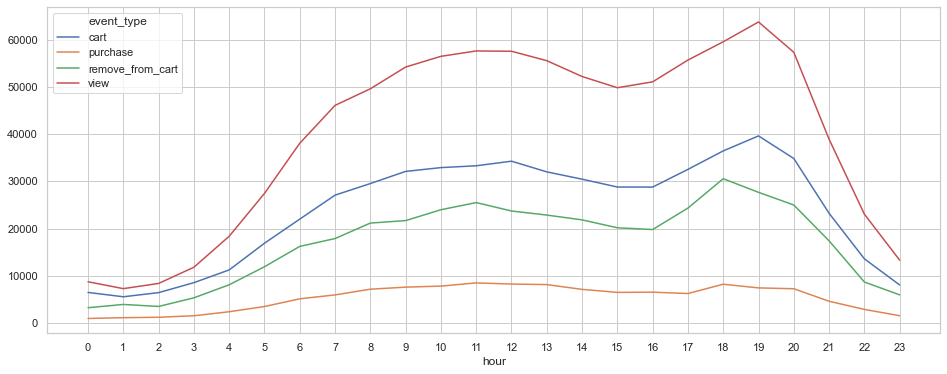

In [15]:
event_hour.plot(figsize=(16,6))
plt.xticks(ticks = event_hour.index);

There is a global pattern as expected.

But to better see the differences a new variable will be created which is the ratio of purchases per visit in each hour.

In [16]:
print(event_hour.dtypes)

event_type
cart                int64
purchase            int64
remove_from_cart    int64
view                int64
dtype: object


In [17]:
event_hour['compare_visits'] = event_hour['purchase'] / event_hour['view'] * 100
event_hour

event_type,cart,purchase,remove_from_cart,view,compare_visits
hour,,,,,
0,6475,962,3238,8731,11.02
1,5555,1128,3930,7280,15.49
2,6433,1220,3509,8378,14.56
3,8544,1535,5331,11807,13.00
4,11242,2389,8095,18365,13.01
5,16890,3491,11913,27438,12.72
6,21993,5125,16223,38055,13.47
7,27069,5951,17883,46072,12.92
8,29526,7158,21156,49587,14.44


We reorder the variables

In [18]:
event_hour = event_hour[['view','cart','remove_from_cart','purchase','compare_visits']]
event_hour

event_type,view,cart,remove_from_cart,purchase,compare_visits
hour,,,,,
0,8731,6475,3238,962,11.02
1,7280,5555,3930,1128,15.49
2,8378,6433,3509,1220,14.56
3,11807,8544,5331,1535,13.00
4,18365,11242,8095,2389,13.01
5,27438,16890,11913,3491,12.72
6,38055,21993,16223,5125,13.47
7,46072,27069,17883,5951,12.92
8,49587,29526,21156,7158,14.44


We visualize to see if there are hours when proportionally more is purchased.

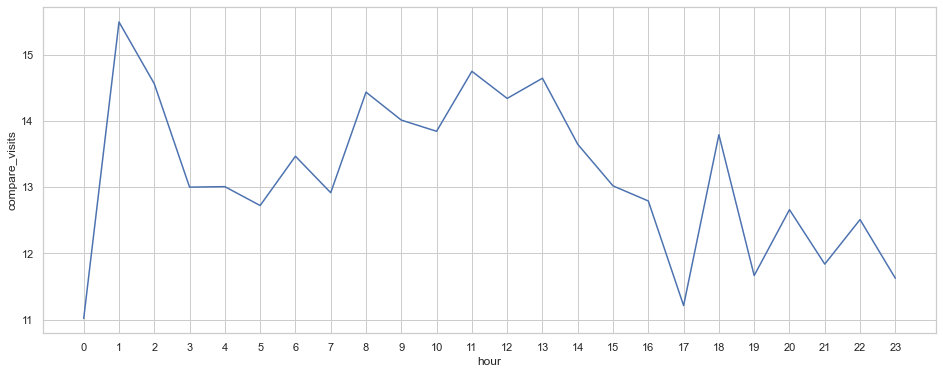

In [19]:
plt.figure(figsize = (16,6))
sns.lineplot(data = event_hour, x = event_hour.index, y = 'compare_visits')
plt.xticks(event_hour.index);

Conclusions:
    
* The hours when people shop the most are 1 am, 8 am, 11 am to 1 pm and 6 pm.
* The hours when people do not buy are 24:00, 3:00 to 7:00, 14:00 to 17:00 and 19:00 to 23:00.

It is analyzed below (not at all) whether or not there are more frequent hours for each type of event.

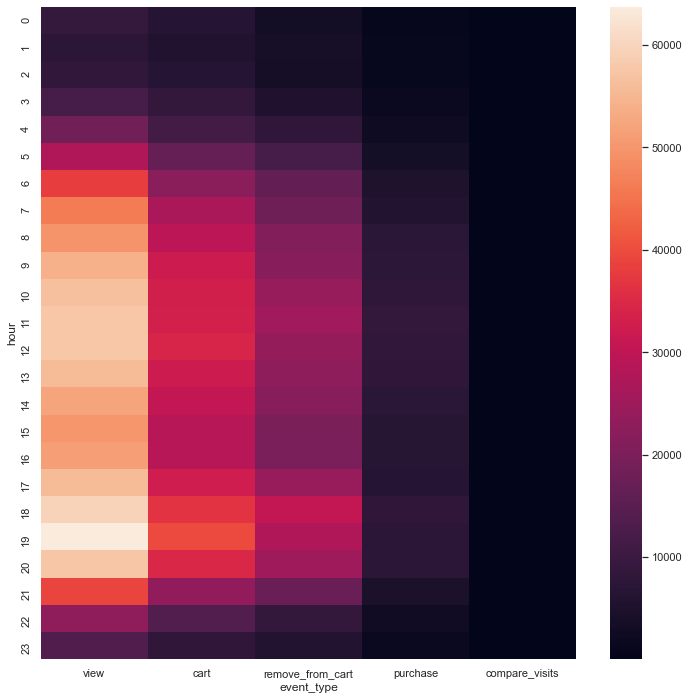

In [20]:
plt.figure(figsize = (12,12))
sns.heatmap(data = event_hour);

Problem: as each event has a different scale, this graph does not allow us to differentiate the patterns well. The variables will be typified to solve this problem.

In [21]:
def tipificar(variable):
    media = variable.mean()
    dt = variable.std()
    return(variable.apply(lambda x: (x - media) / dt))

In [22]:
event_hour_tip = event_hour.apply(tipificar)
event_hour_tip

event_type,view,cart,remove_from_cart,purchase,compare_visits
hour,,,,,
0,-1.60,-1.56,-1.63,-1.62,-1.83
1,-1.68,-1.64,-1.54,-1.56,1.91
2,-1.62,-1.56,-1.59,-1.53,1.13
3,-1.45,-1.37,-1.38,-1.41,-0.17
4,-1.11,-1.13,-1.06,-1.09,-0.17
5,-0.65,-0.63,-0.61,-0.68,-0.41
6,-0.10,-0.17,-0.10,-0.07,0.22
7,0.31,0.28,0.09,0.24,-0.24
8,0.49,0.50,0.48,0.69,1.03


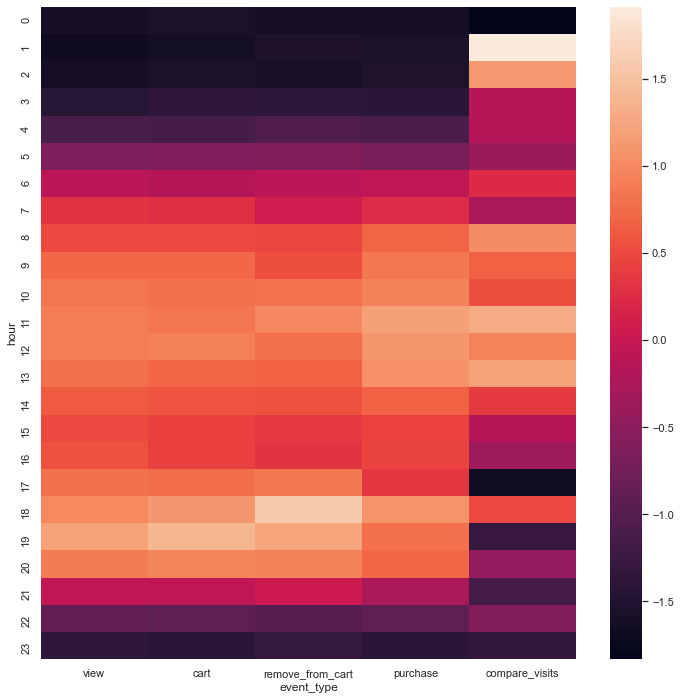

In [23]:
plt.figure(figsize = (12,12))
sns.heatmap(data = event_hour_tip);

Line graph display to see it more clearly.

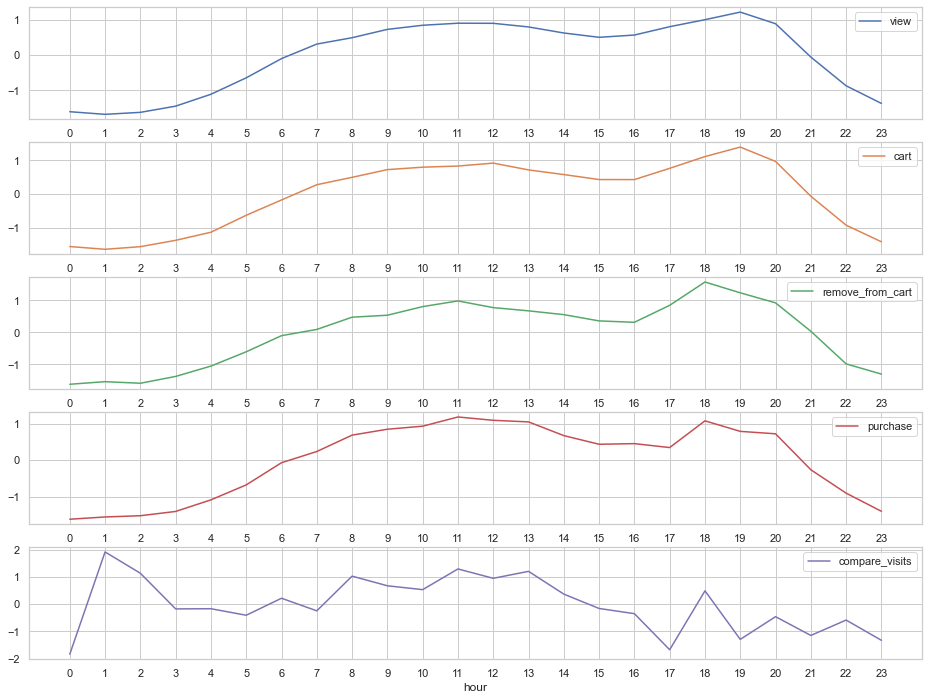

In [24]:
event_hour_tip.plot(subplots = True, sharex = False, figsize = (16,12),xticks = event_hour_tip.index);

Conclusions:

* **INSIGHT #1**: All metrics are maximized in the ranges between 9 and 13 and between 18 and 20.
* This information is very relevant for paid ads campaigns, both traffic generation and retargeting.
* In addition, there seems to be some subtype of user who buys at 1 in the morning, who, although not very frequent, do buy large quantities.

### What is the average monthly turnover?

In [25]:
df.loc[df.event_type == 'purchase'].groupby('month').price.sum().mean()

124309.91999999837

### What is the trend in recent months?

In [26]:
df.resample('M')

In [27]:
tendencia = df.groupby('event_type').resample('W', kind = 'period').event_type.count().unstack(level = 0)
tendencia

event_type,cart,purchase,remove_from_cart,view
event_time,,,,
2019-10-06,31483,4440,14647,36353
2019-10-13,28151,5422,17989,44410
2019-10-20,23920,5033,15303,39486
2019-10-27,25651,5665,18411,40383
2019-11-03,24087,5746,16491,39365
2019-11-10,29142,6663,24008,46177
2019-11-17,25335,5141,17215,41170
2019-11-24,38069,9754,27973,56477
2019-12-01,31994,7493,23106,48883


In [28]:
tendencia = tendencia[['view','cart','remove_from_cart','purchase']]
tendencia

event_type,view,cart,remove_from_cart,purchase
event_time,,,,
2019-10-06,36353,31483,14647,4440
2019-10-13,44410,28151,17989,5422
2019-10-20,39486,23920,15303,5033
2019-10-27,40383,25651,18411,5665
2019-11-03,39365,24087,16491,5746
2019-11-10,46177,29142,24008,6663
2019-11-17,41170,25335,17215,5141
2019-11-24,56477,38069,27973,9754
2019-12-01,48883,31994,23106,7493


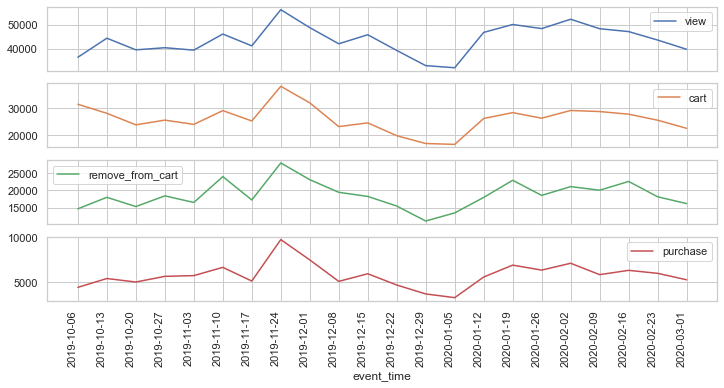

In [29]:
tendencia.plot(subplots = True, figsize = (12,6), sharex = True, xticks = tendencia.index, x_compat=True, rot = 90);

The trend is flat in all metrics, which confirms the need for CRO actions.

There is a significant peak in the week of the 24th, obviously due to black friday, the same analysis will be performed but on a daily level and only for November and December to see this effect.

In [30]:
tendencia_diaria = df.loc['2019-11':'2019-12'].groupby('event_type').resample('D').event_type.count().unstack(level = 0)
tendencia_diaria

event_type,cart,purchase,remove_from_cart,view
event_time,,,,
2019-11-01,3565,709,2810,5352
2019-11-02,3015,912,2124,4857
2019-11-03,3540,755,2622,5583
2019-11-04,4652,676,4854,6248
2019-11-05,4118,753,2711,7213
...,...,...,...,...
2019-12-27,2023,507,1335,4058
2019-12-28,1744,329,1193,3704
2019-12-29,2134,263,1149,3939


In [31]:
tendencia_diaria = tendencia_diaria[['view','cart','remove_from_cart','purchase']]
tendencia_diaria

event_type,view,cart,remove_from_cart,purchase
event_time,,,,
2019-11-01,5352,3565,2810,709
2019-11-02,4857,3015,2124,912
2019-11-03,5583,3540,2622,755
2019-11-04,6248,4652,4854,676
2019-11-05,7213,4118,2711,753
...,...,...,...,...
2019-12-27,4058,2023,1335,507
2019-12-28,3704,1744,1193,329
2019-12-29,3939,2134,1149,263


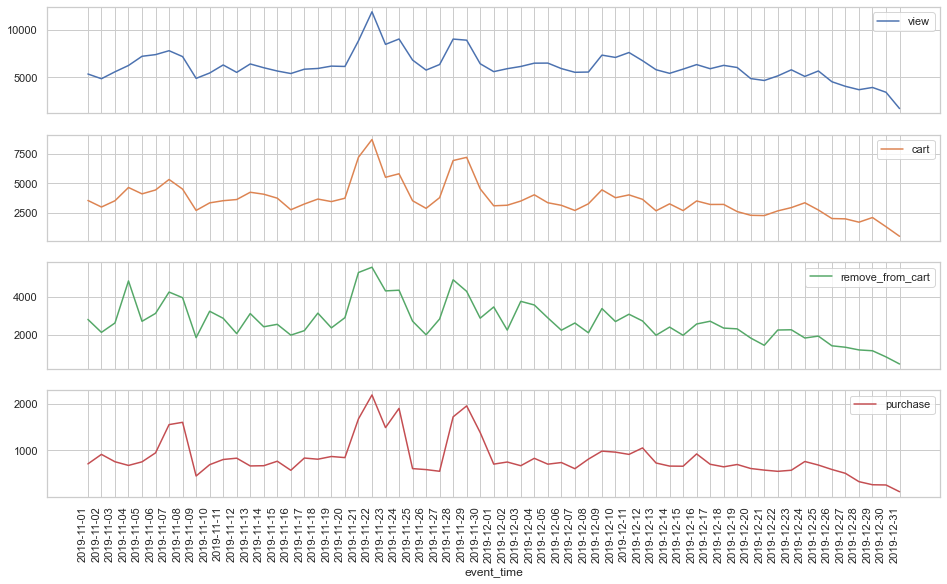

In [32]:
tendencia_diaria.plot(subplots = True, figsize = (16,10), sharex = True, xticks = tendencia_diaria.index, x_compat=True, rot = 90);

Conclusions:

* Indeed the peak coincides with the black friday (day 29).
* But there is still a higher peak a few days earlier, on the 22nd, possibly due to the beginning of the black friday week.
* Surprisingly, the Christmas days themselves have a decreasing trend, which means that consumers have clearly brought forward their purchases.

Same analysis for January and February.

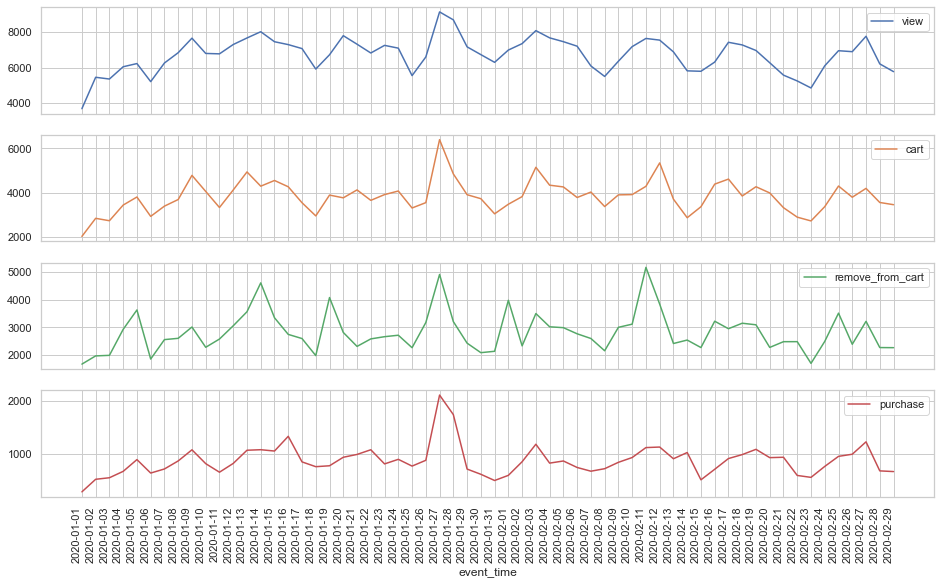

In [33]:
tendencia_diaria = df.loc['2020-01':'2020-02'].groupby('event_type').resample('D').event_type.count().unstack(level = 0)
tendencia_diaria = tendencia_diaria[['view','cart','remove_from_cart','purchase']]
tendencia_diaria.plot(subplots = True, figsize = (16,10), sharex = True, xticks = tendencia_diaria.index, x_compat=True, rot = 90);

Conclusions:

* During the week of Epiphany there is no peak in sales either.
* Nor the days before Valentine's Day.
* But there is a very pronounced peak on January 27th, most likely a local event.

**INSIGHT #2** The whole Christmas shopping pie is shared out in the week of black friday.

### Moments of truth?

Could we be able to identify moments at the day-hour level when the highest number of purchases occur?

It would be very useful to concentrate much of the campaign investment right at those times.

In [34]:
purchase_per_hora = df.loc[df.event_type == 'purchase'].groupby(['date','hour']).event_type.count().unstack(level = 0).fillna(0)
purchase_per_hora

date,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,...,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
hour,,,,,,,,,,,,,,,,,,,,,
0,13.00,18.00,1.00,2.00,0.00,0.00,0.00,0.00,3.00,23.00,...,28.00,0.00,0.00,0.00,0.00,55.00,5.00,40.00,0.00,0.00
1,0.00,0.00,5.00,0.00,4.00,24.00,3.00,0.00,16.00,0.00,...,0.00,5.00,0.00,2.00,21.00,11.00,0.00,5.00,26.00,33.00
2,0.00,0.00,0.00,24.00,0.00,0.00,0.00,18.00,4.00,18.00,...,9.00,0.00,0.00,10.00,0.00,34.00,0.00,0.00,0.00,8.00
3,0.00,24.00,10.00,0.00,0.00,26.00,2.00,20.00,16.00,55.00,...,0.00,14.00,13.00,0.00,5.00,15.00,0.00,10.00,0.00,0.00
4,15.00,0.00,45.00,27.00,3.00,24.00,12.00,46.00,56.00,0.00,...,6.00,22.00,34.00,17.00,7.00,16.00,10.00,148.00,16.00,0.00
5,49.00,9.00,6.00,17.00,1.00,14.00,21.00,10.00,0.00,43.00,...,23.00,8.00,28.00,0.00,14.00,103.00,6.00,48.00,11.00,3.00
6,23.00,34.00,18.00,10.00,10.00,13.00,38.00,35.00,14.00,12.00,...,7.00,22.00,5.00,46.00,26.00,20.00,94.00,26.00,58.00,35.00
7,26.00,60.00,26.00,54.00,58.00,20.00,63.00,27.00,26.00,59.00,...,98.00,67.00,52.00,10.00,30.00,23.00,30.00,53.00,38.00,65.00
8,28.00,71.00,129.00,49.00,20.00,37.00,27.00,41.00,89.00,62.00,...,30.00,95.00,35.00,52.00,30.00,17.00,120.00,80.00,67.00,25.00


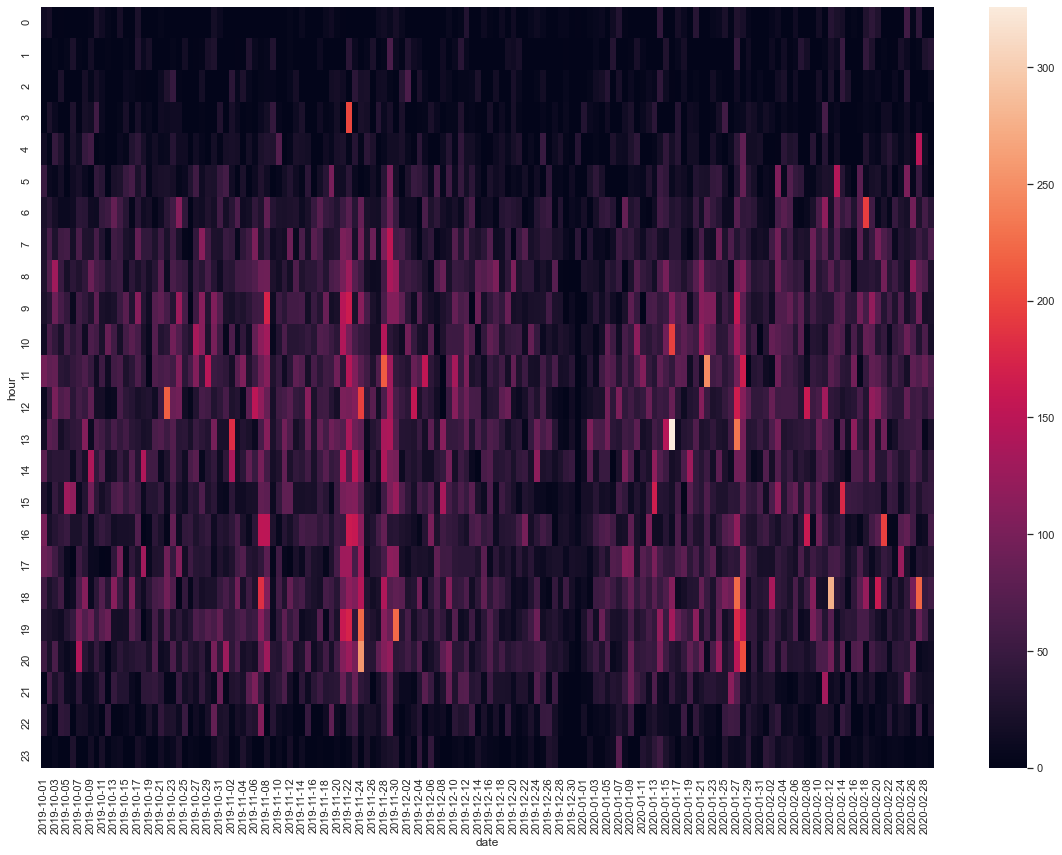

In [35]:
plt.figure(figsize = (20,14))
sns.heatmap(purchase_per_hora);

## Understanding customers

To analyze at the customer level it is best to create a shopper-only dataframe with customer granularity and the variables of interest.

In [36]:
clients = df.loc[df.event_type == 'purchase'].groupby(['user_id']).agg({'product_id':'count',
                                                          'user_session':'nunique', 
                                                          'price': 'mean',
                                                          'date': 'max'})

clients

,product_id,user_session,price,date
user_id,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


We rename

In [37]:
clients.columns = ['products_tot_num','purchases_tot_num','average_price_prod','ult_purchase']
clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase
user_id,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


Calculation of additional variables.

In [38]:
clients['expenditure_tot'] = clients.products_tot_num * clients.average_price_prod
clients['productos_por_compra'] = clients.products_tot_num / clients.purchases_tot_num
clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra
user_id,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00
27756757,1,1,20.63,2020-01-27,20.63,1.00
50748978,9,1,1.11,2019-12-14,10.01,9.00
52747911,3,1,7.67,2019-10-10,23.02,3.00
65241811,5,1,8.36,2019-11-11,41.79,5.00
...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00
622021687,1,1,13.33,2020-02-29,13.33,1.00
622041514,3,1,0.63,2020-02-29,1.90,3.00


### How are customers distributed in terms of spending?

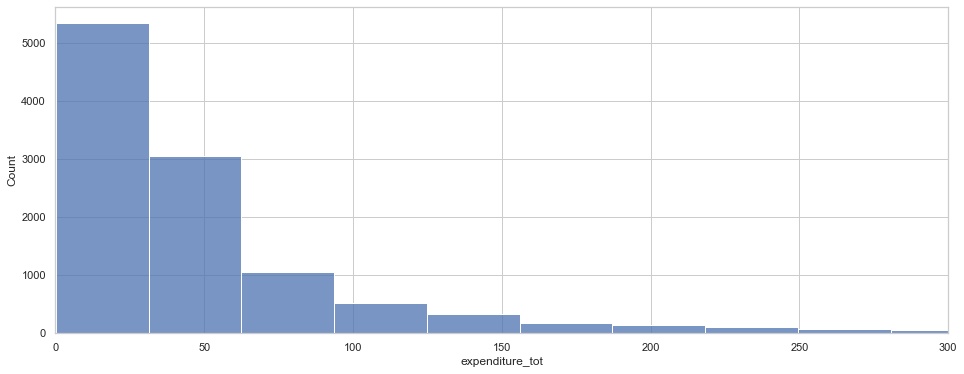

In [39]:
plt.subplots(figsize=(16,6))
sns.histplot(data = clients, x = 'expenditure_tot', bins = 50)
plt.xlim([0,300]);

The vast majority of customers have spent less than €50 in the period.

### How are customers distributed in terms of number of purchases?

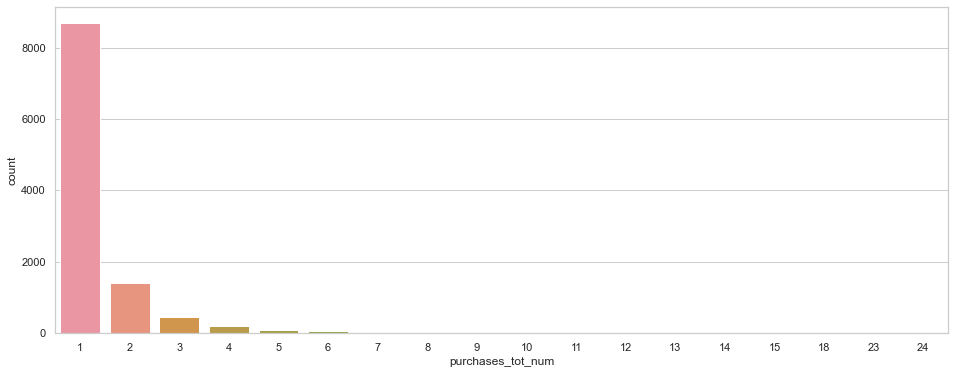

In [40]:
plt.subplots(figsize=(16,6))
sns.countplot(data = clients, x = 'purchases_tot_num');

**The vast majority of customers make only one purchase.

There is great scope for improving this ratio by:

* email marketing with newsletters and personalized offers.

### How many products does a customer buy on average per purchase?

In [41]:
clients.productos_por_compra.describe()

count          11040.00
mean               7.79
std                9.49
min                1.00
25%                3.00
50%                5.00
75%               10.00
max              219.00
Name: productos_por_compra, dtype: float64

**The median purchase includes 5 products.

But 25% of customers buy more than 10 products in the same purchase.

There is great scope for improving this ratio through:

* recommendation systems at the time of purchase.

### Which customers have generated the most revenue for us?

In [42]:
clients.nlargest(n = 10, columns = 'expenditure_tot')

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra
user_id,,,,,,
573823111,268,2,5.82,2020-02-21,1559.21,134.00
539751397,236,13,6.16,2020-02-19,1453.37,18.15
556579890,506,4,2.75,2020-02-27,1392.45,126.50
442763940,195,8,6.37,2019-12-23,1241.53,24.38
561592095,94,3,11.81,2019-10-31,1109.70,31.33
527739278,244,13,4.39,2020-02-16,1071.00,18.77
527806771,195,13,4.86,2020-02-20,948.01,15.00
430220205,190,6,4.99,2020-02-29,947.30,31.67
491009486,219,1,4.32,2020-02-12,946.20,219.00


Average total spend per customer.

In [43]:
clients.expenditure_tot.describe()

count          11040.00
mean              56.30
std               81.73
min                0.13
25%               16.22
50%               32.74
75%               60.30
max             1559.21
Name: expenditure_tot, dtype: float64

**There are customers with average spending dozens of times higher than the average.

These customers need to be retained through loyalty programs.

### What is customer survival?

Given that only 5 months of historical data are available, a 3-month cohort analysis will be created, which allows for 3 cohorts.

Dataframe only with buyers and with the variables user and month.

In [44]:
c = df.loc[df.event_type == 'purchase', ['user_id','month']]
c

,user_id,month
event_time,,
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
...,...,...
2020-02-29 22:29:19,622065819,2
2020-02-29 22:29:19,622065819,2
2020-02-29 22:29:19,622065819,2


We spent the months in columns.

In [45]:
c = pd.crosstab(c.user_id,c.month).reset_index()
c

month,user_id,1,2,10,11,12
0,25392526,0,0,0,0,3
1,27756757,1,0,0,0,0
2,50748978,0,0,0,0,9
3,52747911,0,0,3,0,0
4,65241811,0,0,0,5,0
...,...,...,...,...,...,...
11035,621995551,0,5,0,0,0
11036,622021687,0,1,0,0,0
11037,622041514,0,3,0,0,0
11038,622042698,0,3,0,0,0


We rename and delete the user that we no longer need.

In [46]:
c.columns = ['user_id','c4','c5','c1','c2','c3']
c.drop(columns = 'user_id', inplace = True)
c

,c4,c5,c1,c2,c3
0,0,0,0,0,3
1,1,0,0,0,0
2,0,0,0,0,9
3,0,0,3,0,0
4,0,0,0,5,0
...,...,...,...,...,...
11035,0,5,0,0,0
11036,0,1,0,0,0
11037,0,3,0,0,0
11038,0,3,0,0,0


The first cohort will be that of month 2, since we want to select "new" customers (at least those who were not in the previous month).

In [47]:
c2 = c.loc[(c.c1 == 0) & (c.c2 > 0)]
c2

,c4,c5,c1,c2,c3
4,0,0,0,5,0
6,0,0,0,10,0
8,0,0,0,27,17
9,0,0,0,3,0
13,0,0,0,4,0
...,...,...,...,...,...
7702,0,0,0,5,0
7703,0,5,0,2,0
7705,0,0,0,1,0
7708,0,0,0,5,6


We move to a binary dataframe since we only care if that customer has purchased or not in each month.

In [48]:
def binarizar(variable):
    variable = variable.transform(lambda x: 1 if (x > 0) else 0)
    return(variable)

In [49]:
c2_b = c2.apply(binarizar)
c2_b

,c4,c5,c1,c2,c3
4,0,0,0,1,0
6,0,0,0,1,0
8,0,0,0,1,1
9,0,0,0,1,0
13,0,0,0,1,0
...,...,...,...,...,...
7702,0,0,0,1,0
7703,0,1,0,1,0
7705,0,0,0,1,0
7708,0,0,0,1,1


Let's calculate the percentage of customers in this cohort who have continued to buy in the following months.

In [50]:
c2_f = c2_b.sum() / c2_b.shape[0]
c2_f = c2_f.sort_index()
c2_f

c1              0.00
c2              1.00
c3              0.10
c4              0.10
c5              0.08
dtype: float64

We replicated the entire process for cohort 3.

In [51]:
c3 = c.loc[(c.c2 == 0) & (c.c3 > 0)]
c3_b = c3.apply(binarizar)
c3_f = c3_b.sum() / c3_b.shape[0]
c3_f = c3_f.sort_index()
c3_f['c1'] = 0
c3_f

c1              0.00
c2              0.00
c3              1.00
c4              0.10
c5              0.08
dtype: float64

We replicated the entire process for cohort 4.

In [52]:
c4 = c.loc[(c.c3 == 0) & (c.c4 > 0)]
c4_b = c4.apply(binarizar)
c4_f = c4_b.sum() / c4_b.shape[0]
c4_f = c4_f.sort_index()
c4_f['c1'] = 0
c4_f['c2'] = 0
c4_f

c1              0.00
c2              0.00
c3              0.00
c4              1.00
c5              0.12
dtype: float64

We create the cohort dataframe.

In [53]:
cohortes = pd.DataFrame({'c2':c2_f,'c3':c3_f,'c4':c4_f})
cohortes

,c2,c3,c4
c1,0.00,0.00,0.00
c2,1.00,0.00,0.00
c3,0.10,1.00,0.00
c4,0.10,0.10,1.00
c5,0.08,0.08,0.12


In [54]:
cohortes = cohortes.drop(index = 'c1').T
cohortes

,c2,c3,c4,c5
c2,1.00,0.10,0.10,0.08
c3,0.00,1.00,0.10,0.08
c4,0.00,0.00,1.00,0.12


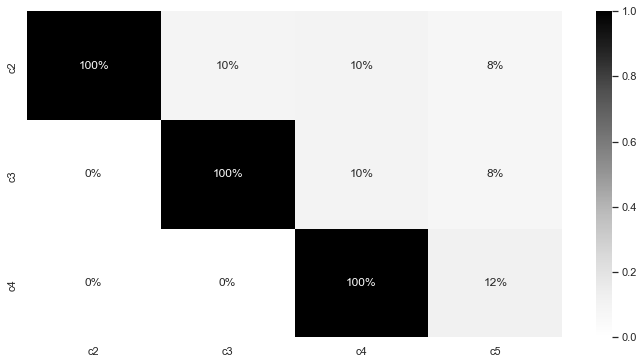

In [55]:
plt.figure(figsize = (12,6))
sns.heatmap(cohortes,annot = True, fmt = '.0%', cmap='Greys');

**INSIGHT #6**: 90% of new customers do not buy again in the following months.

### What is the LTV of the customers?

Taking into account the 90% that new customers do not buy again in the following months, we can calculate the LTV with the history we have with acceptable accuracy.

To do this we will select customers from cohort 2 and calculate their total purchases.

In [56]:
maestro_ltv = df.loc[(df.event_type == 'purchase') & (df.month != 10) & (df.month == 11),'user_id'].to_list()
maestro_ltv

[549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 491040843,
 491040843,
 491040843,
 491040843,
 491040843,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 483964876,
 483964876,
 483964876,
 483964876,
 483964876,
 483964876,
 483964876,
 497964079,
 497964079,
 497964079,
 497964079,
 566332999,
 551059137,
 539216862,
 539216862,
 539216862,
 539216862,
 539

In [57]:
clients_ltv = clients.loc[clients.index.isin(maestro_ltv)]
clients_ltv

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra
user_id,,,,,,
65241811,5,1,8.36,2019-11-11,41.79,5.00
80577370,10,2,10.62,2019-11-29,106.24,5.00
88211255,22,4,4.86,2020-02-25,106.87,5.50
93279832,44,2,3.19,2019-12-19,140.51,22.00
94390236,3,1,9.73,2019-11-07,29.20,3.00
...,...,...,...,...,...,...
579798049,5,1,2.10,2019-11-30,10.52,5.00
579813390,7,2,2.98,2020-02-04,20.83,3.50
579834429,1,1,27.14,2019-11-30,27.14,1.00


In [58]:
clients_ltv.expenditure_tot.describe()

count           3105.00
mean              79.62
std              113.62
min                0.13
25%               20.29
50%               41.49
75%               90.00
max             1453.37
Name: expenditure_tot, dtype: float64

Given the variability of the mean it would be more conservative to use the median.

**INSIGHT #7**: The average LTV is €42.

Applying the company's margin on that figure and the % to be devoted to acquisition, the maximum amount to invest in CPA is obtained.

Applying CRO actions will increase the LTV and therefore also the CPA, which is a very important strategic advantage.

### On which customers to run the next campaigns (RFM)?

The technique known as RFM (Recency - Frequency - Monetary) segmentation will be used.

This technique is very powerful for retail contexts and therefore also in ecommerce.

It allows to answer needs such as:

* What is the proportion of customers who place a single order and frequent customers.
* Which are the VIP customers (who potentially need loyalty programs and personalized attention).
* What is the number of new customers (to be encouraged to place a repeat order).
* How many and which are the customers who have not made purchases for a long time.
* How many and which are the customers who are not worth investing more time and resources in.
* ...

Despite its power, it is simple to construct, so it is almost obligatory in this type of analysis.

First we will identify the variables with which to create each of the dimensions:

* Recency: `ult_purchase`.
* Frequency: `purchases_tot_num`.
* Monetary: `expenditure_tot`.

And each of them will be discretized.

Frequency:

In [59]:
clients['F'] = clients.purchases_tot_num.transform(lambda x: pd.cut(x,5, labels = False)) + 1
clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra,F
user_id,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1
27756757,1,1,20.63,2020-01-27,20.63,1.00,1
50748978,9,1,1.11,2019-12-14,10.01,9.00,1
52747911,3,1,7.67,2019-10-10,23.02,3.00,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1
...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1
622021687,1,1,13.33,2020-02-29,13.33,1.00,1
622041514,3,1,0.63,2020-02-29,1.90,3.00,1


Verification:

In [60]:
clients.groupby('F').purchases_tot_num.mean()

F
1              1.31
2              7.06
3             12.00
4             16.50
5             23.50
Name: purchases_tot_num, dtype: float64

Monetary:

In [61]:
clients['M'] = clients.expenditure_tot.transform(lambda x: pd.cut(x,5, labels = False)) + 1
clients.groupby('M').expenditure_tot.mean()

M
1             48.36
2            410.98
3            765.18
4           1043.96
5           1468.34
Name: expenditure_tot, dtype: float64

Recency: the date must be transformed to a number, for example the distance in days from each date to the most recent date available.

In [62]:
most_recent = clients.ult_purchase.max()

clients['ult_purchase_days'] = clients.ult_purchase.transform(lambda x: most_recent - x)

clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra,F,M,ult_purchase_days
user_id,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73 days
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33 days
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77 days
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142 days
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110 days
...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0 days
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0 days
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0 days


A timedelta has been created, which will be converted to number of days.

In [63]:
clients['ult_purchase_days'] = clients.ult_purchase_days.dt.days
clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra,F,M,ult_purchase_days
user_id,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110
...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0


Creation of Recencia:

In [64]:
clients['R'] = clients.ult_purchase_days.transform(lambda x: pd.cut(x,5, labels = False)) + 1
clients.groupby('R').ult_purchase_days.mean()

R
1             14.62
2             43.04
3             75.94
4            103.85
5            135.91
Name: ult_purchase_days, dtype: float64

Integration in rfm dataframe.

In [65]:
clients['R'] = 6 - clients.R
clients.groupby('R').ult_purchase_days.mean()

R
1            135.91
2            103.85
3             75.94
4             43.04
5             14.62
Name: ult_purchase_days, dtype: float64

Integration in rfm dataframe.

In [66]:
clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra,F,M,ult_purchase_days,R
user_id,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2
...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5


Creation of additional variables.

In [67]:
clients['value'] = clients.R + clients.F + clients.M
clients['RFM'] = clients.apply(lambda x: str(x.R) + str(x.F) + str(x.M), axis = 1)
clients

,products_tot_num,purchases_tot_num,average_price_prod,ult_purchase,expenditure_tot,productos_por_compra,F,M,ult_purchase_days,R,value,RFM
user_id,,,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3,5,311
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4,6,411
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3,5,311
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1,3,111
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2,4,211
...,...,...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5,7,511
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5,7,511
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5,7,511


An infinite number of analyses can be performed on this dataframe.

In [70]:
metricas = ['products_tot_num','purchases_tot_num','expenditure_tot']
dimensiones = ['R','F','M','RFM','value']

minicubo = clients[dimensiones + metricas]
minicubo

,R,F,M,RFM,value,products_tot_num,purchases_tot_num,expenditure_tot
user_id,,,,,,,,
25392526,3,1,1,311,5,3,1,22.14
27756757,4,1,1,411,6,1,1,20.63
50748978,3,1,1,311,5,9,1,10.01
52747911,1,1,1,111,3,3,1,23.02
65241811,2,1,1,211,4,5,1,41.79
...,...,...,...,...,...,...,...,...
621995551,5,1,1,511,7,5,1,10.46
622021687,5,1,1,511,7,1,1,13.33
622041514,5,1,1,511,7,3,1,1.90


In [71]:
minicubo = minicubo.melt(id_vars = metricas)
minicubo

<ipython-input-71-61db51a89929>:1: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



,products_tot_num,purchases_tot_num,expenditure_tot,variable,value
0,3,1,22.14,R,3
1,1,1,20.63,R,4
2,9,1,10.01,R,3
3,3,1,23.02,R,1
4,5,1,41.79,R,2
...,...,...,...,...,...
55195,5,1,10.46,value,7
55196,1,1,13.33,value,7
55197,3,1,1.90,value,7
55198,3,1,84.13,value,7


In [72]:
minicubo = minicubo.groupby(['variable','value'], as_index = False)[metricas].mean()
minicubo

,variable,value,products_tot_num,purchases_tot_num,expenditure_tot
0,F,1,10.61,1.31,52.09
1,F,2,71.42,7.06,320.47
2,F,3,123.64,12.00,643.20
3,F,4,156.75,16.50,560.16
4,F,5,124.00,23.50,652.42
...,...,...,...,...,...
58,value,9,98.02,7.25,491.71
59,value,10,140.89,10.22,625.93
60,value,11,291.00,5.75,1189.30
61,value,12,189.80,16.60,833.43


In [73]:
minicubo[minicubo.variable == 'F']

,variable,value,products_tot_num,purchases_tot_num,expenditure_tot
0,F,1,10.61,1.31,52.09
1,F,2,71.42,7.06,320.47
2,F,3,123.64,12.00,643.20
3,F,4,156.75,16.50,560.16
4,F,5,124.00,23.50,652.42


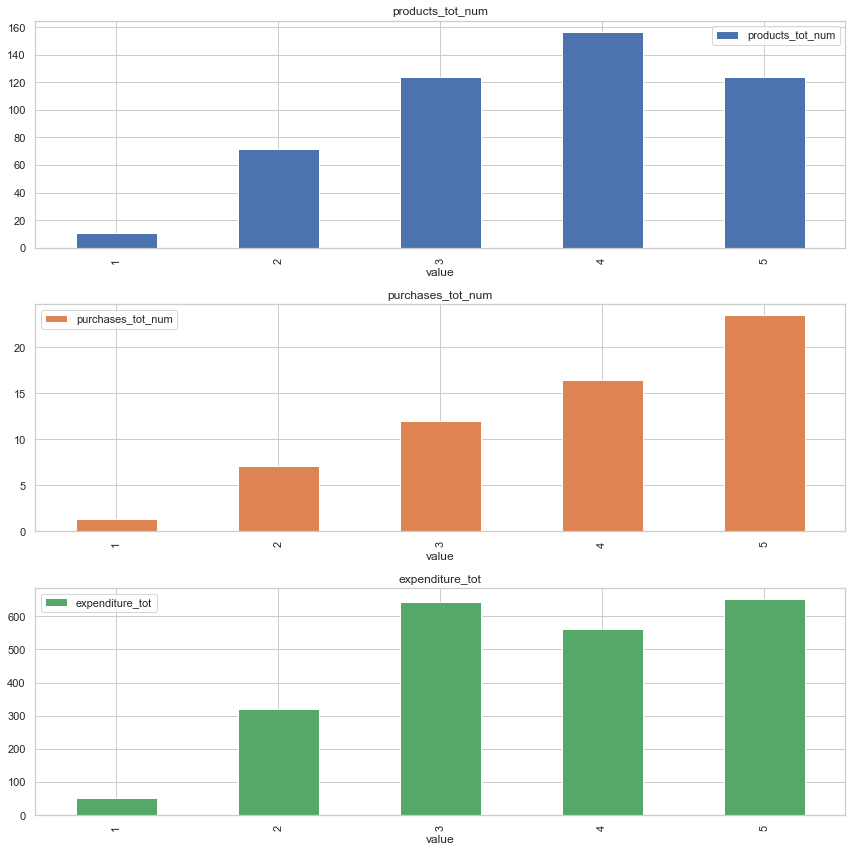

In [74]:
minicubo[minicubo.variable == 'F'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [75]:
minicubo[minicubo.variable == 'R']

,variable,value,products_tot_num,purchases_tot_num,expenditure_tot
10,R,1,8.15,1.08,41.56
11,R,2,9.25,1.18,45.58
12,R,3,9.54,1.29,47.25
13,R,4,11.72,1.44,58.19
14,R,5,16.83,1.82,79.04


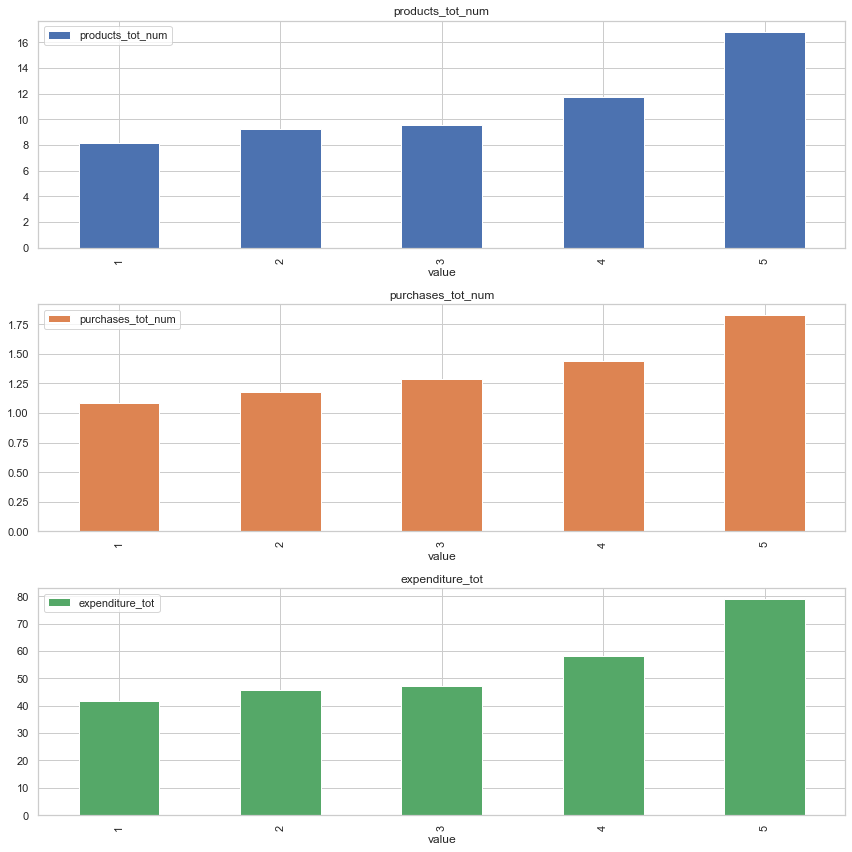

In [76]:
minicubo[minicubo.variable == 'R'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [77]:
minicubo[minicubo.variable == 'M']

,variable,value,products_tot_num,purchases_tot_num,expenditure_tot
5,M,1,10.12,1.34,48.36
6,M,2,74.28,4.31,410.98
7,M,3,138.50,6.86,765.18
8,M,4,189.50,7.33,1043.96
9,M,5,336.67,6.33,1468.34


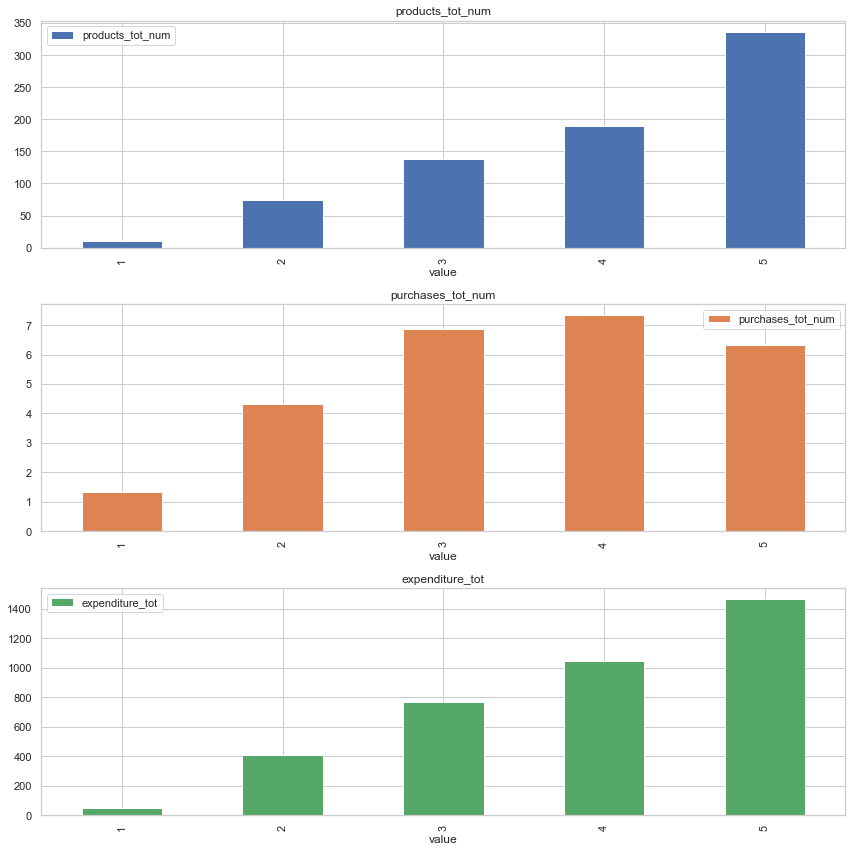

In [78]:
minicubo[minicubo.variable == 'M'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [79]:
minicubo[minicubo.variable == 'RFM']

,variable,value,products_tot_num,purchases_tot_num,expenditure_tot
15,RFM,111,7.97,1.08,39.28
16,RFM,112,37.38,1.50,397.98
17,RFM,114,94.00,3.00,1109.70
18,RFM,211,8.94,1.17,43.16
19,RFM,212,47.00,1.73,391.14
20,RFM,213,35.50,1.00,662.84
21,RFM,221,85.67,6.33,194.48
22,RFM,311,8.98,1.26,43.91
23,RFM,312,53.46,2.46,376.38
24,RFM,321,39.00,6.50,141.28


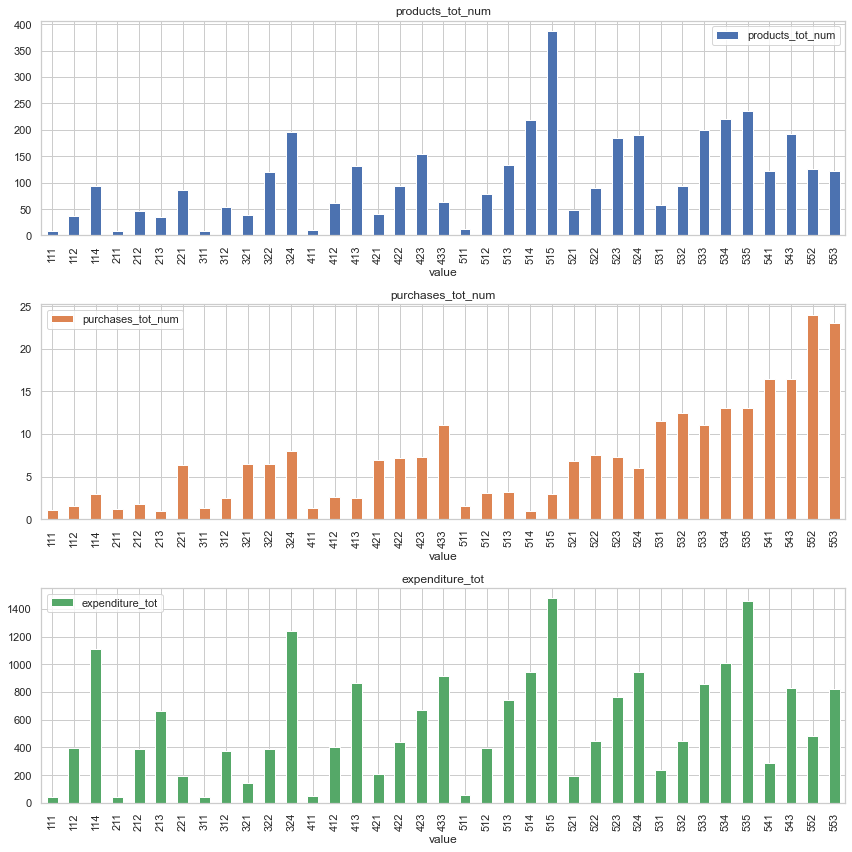

In [80]:
minicubo[minicubo.variable == 'RFM'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [84]:
minicubo[minicubo.variable == 'value']

,variable,value,products_tot_num,purchases_tot_num,expenditure_tot
52,value,3,7.97,1.08,39.28
53,value,4,9.04,1.17,44.41
54,value,5,9.31,1.27,46.08
55,value,6,10.73,1.38,53.07
56,value,7,12.64,1.54,60.42
57,value,8,66.13,5.06,313.01
58,value,9,98.02,7.25,491.71
59,value,10,140.89,10.22,625.93
60,value,11,291.00,5.75,1189.30
61,value,12,189.80,16.60,833.43


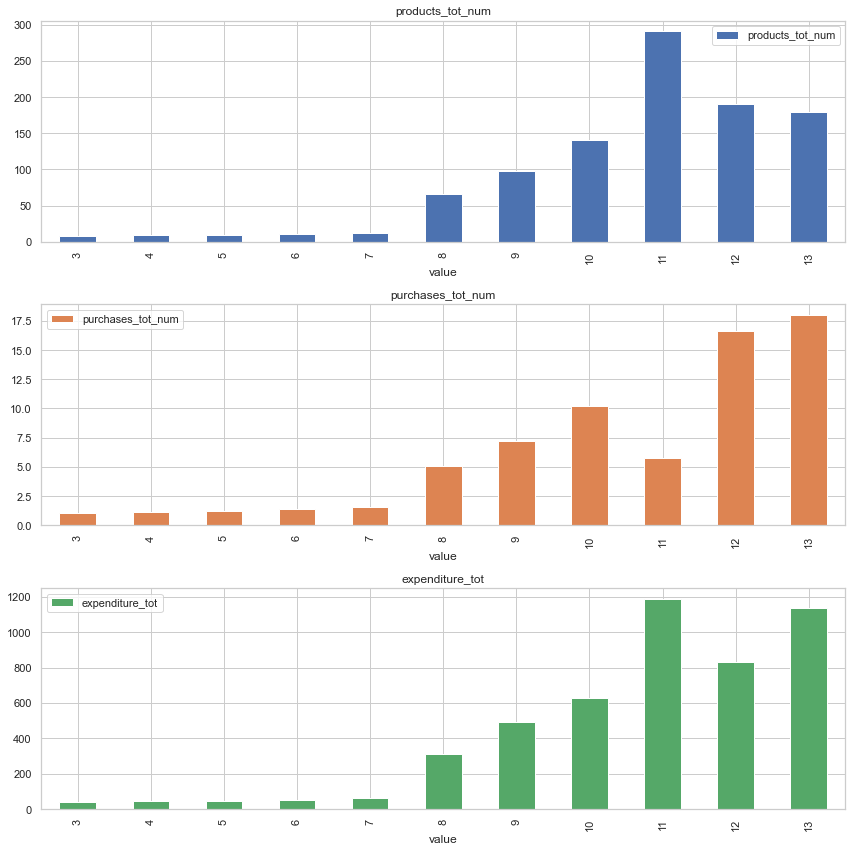

In [85]:
minicubo[minicubo.variable == 'value'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

The analysis could be improved because in F and M the outliers cause most of the data to be concentrated in category 1. It would be advisable to eliminate these outliers and run the exercise again.

With this analysis, we have identified the customers who are most likely to respond better to new campaigns, in addition to obtaining a multitude of valuable insights for the business.

## Understanding the products

Creation of dataframe at product level to be able to analyze this dimension.

Calculation of counts of each event in each product.

In [86]:
prod = df.groupby(['product_id','event_type']).size()
prod

product_id  event_type      
3752        view                 10
3762        cart                127
            purchase             28
            remove_from_cart     59
            view                258
                               ... 
5932538     view                  1
5932540     cart                  1
            view                  2
5932578     view                  1
5932585     view                  2
Length: 137068, dtype: int64

In [87]:
prod  = prod.unstack(level = 1).fillna(0)
prod

event_type,cart,purchase,remove_from_cart,view
product_id,,,,
3752,0.00,0.00,0.00,10.00
3762,127.00,28.00,59.00,258.00
3763,10.00,2.00,2.00,51.00
3771,0.00,0.00,0.00,9.00
3774,26.00,7.00,13.00,76.00
...,...,...,...,...
5932537,1.00,0.00,0.00,1.00
5932538,0.00,0.00,0.00,1.00
5932540,1.00,0.00,0.00,2.00


Incorporation of the price, by first creating a price master for each product.

In [90]:
maestro_precios = df.groupby('product_id', as_index = False).price.mean()
maestro_precios

,product_id,price
0,3752,15.71
1,3762,19.29
2,3763,16.00
3,3771,15.08
4,3774,15.92
...,...,...
45322,5932537,1.43
45323,5932538,1.43
45324,5932540,1.43
45325,5932578,6.02


In [91]:
prod = pd.merge(left = prod, right = maestro_precios, how = 'left', on = 'product_id')
prod

,product_id,cart,purchase,remove_from_cart,view,price
0,3752,0.00,0.00,0.00,10.00,15.71
1,3762,127.00,28.00,59.00,258.00,19.29
2,3763,10.00,2.00,2.00,51.00,16.00
3,3771,0.00,0.00,0.00,9.00,15.08
4,3774,26.00,7.00,13.00,76.00,15.92
...,...,...,...,...,...,...
45322,5932537,1.00,0.00,0.00,1.00,1.43
45323,5932538,0.00,0.00,0.00,1.00,1.43
45324,5932540,1.00,0.00,0.00,2.00,1.43
45325,5932578,0.00,0.00,0.00,1.00,6.02


Reordering the names.

In [92]:
prod

,product_id,cart,purchase,remove_from_cart,view,price
0,3752,0.00,0.00,0.00,10.00,15.71
1,3762,127.00,28.00,59.00,258.00,19.29
2,3763,10.00,2.00,2.00,51.00,16.00
3,3771,0.00,0.00,0.00,9.00,15.08
4,3774,26.00,7.00,13.00,76.00,15.92
...,...,...,...,...,...,...
45322,5932537,1.00,0.00,0.00,1.00,1.43
45323,5932538,0.00,0.00,0.00,1.00,1.43
45324,5932540,1.00,0.00,0.00,2.00,1.43
45325,5932578,0.00,0.00,0.00,1.00,6.02


In [93]:
prod = prod[['product_id','view','cart','remove_from_cart','purchase','price']]
prod

,product_id,view,cart,remove_from_cart,purchase,price
0,3752,10.00,0.00,0.00,0.00,15.71
1,3762,258.00,127.00,59.00,28.00,19.29
2,3763,51.00,10.00,2.00,2.00,16.00
3,3771,9.00,0.00,0.00,0.00,15.08
4,3774,76.00,26.00,13.00,7.00,15.92
...,...,...,...,...,...,...
45322,5932537,1.00,1.00,0.00,0.00,1.43
45323,5932538,1.00,0.00,0.00,0.00,1.43
45324,5932540,2.00,1.00,0.00,0.00,1.43
45325,5932578,1.00,0.00,0.00,0.00,6.02


### What are the best selling products?

In [94]:
prod.sort_values('purchase',ascending = False)[0:20]

,product_id,view,cart,remove_from_cart,purchase,price
16807,5809910,9195.00,2796.00,1249.00,764.00,5.21
28178,5854897,624.00,2486.00,793.00,483.00,0.32
6644,5700037,1150.00,2603.00,716.00,361.00,0.40
314,5304,516.00,1184.00,426.00,341.00,0.32
9900,5751422,2204.00,1119.00,625.00,331.00,10.87
15394,5802432,701.00,2495.00,745.00,322.00,0.32
16809,5809912,3059.00,1352.00,863.00,321.00,5.19
18415,5815662,1219.00,1697.00,653.00,310.00,0.91
9862,5751383,2341.00,1035.00,550.00,298.00,10.24
14043,5792800,1527.00,911.00,512.00,285.00,10.25


We could possibly increase sales and average ticket by simply highlighting these products in the store.

### Are there products that do not sell and could we remove from the catalog?

In [95]:
prod[prod.purchase == 0]

,product_id,view,cart,remove_from_cart,purchase,price
0,3752,10.00,0.00,0.00,0.00,15.71
3,3771,9.00,0.00,0.00,0.00,15.08
6,3790,10.00,0.00,0.00,0.00,7.92
8,3809,2.00,0.00,0.00,0.00,12.54
9,3812,1.00,0.00,0.00,0.00,12.54
...,...,...,...,...,...,...
45322,5932537,1.00,1.00,0.00,0.00,1.43
45323,5932538,1.00,0.00,0.00,0.00,1.43
45324,5932540,2.00,1.00,0.00,0.00,1.43
45325,5932578,1.00,0.00,0.00,0.00,6.02


**INSIGHT #8**: Almost half of the products have not had any sales in the 5 months of the history.

A whole new analysis could be started on these products:

* Are they not seen?
* Are they seen but not bought?
* Is it because they are replaced by other products of your own?
* Is it because they are much cheaper in the competition?
* Etc.

They could be removed from the catalog, or at least from the store, newsletter, etc., so that they do not occupy the space of the products that are sold.

### What is the relationship between price and sales volume?

Since this analysis includes sales, we will eliminate products that have not had any sales.

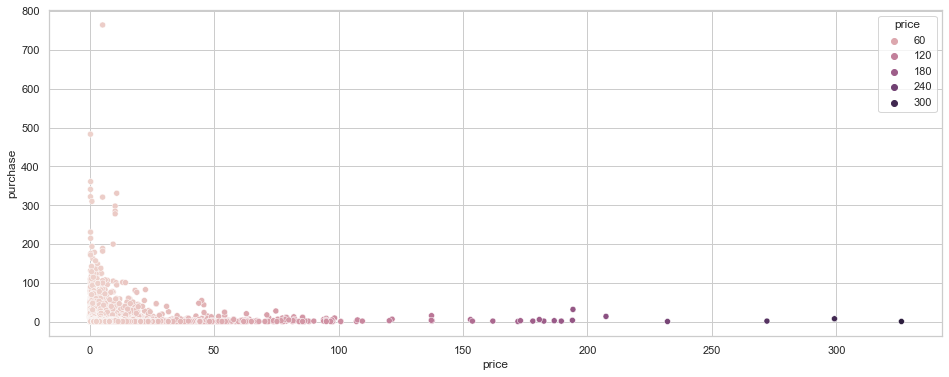

In [96]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod[prod.purchase > 0], x = 'price', y = 'purchase', hue = 'price');

There is a clear decreasing relationship.

Let's zoom in for example below €50 to understand it better.

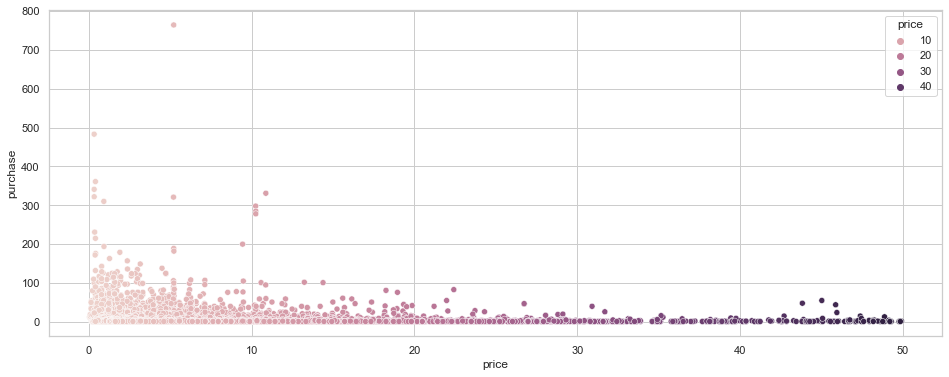

In [98]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod[(prod.purchase > 0) & (prod.price < 50)], x = 'price', y = 'purchase', hue = 'price');

### Are there products that customers regret and remove more from the cart?

In [99]:
prod.insert(loc = 4,
            column = 'remove_from_cart_porc',
            value = prod.remove_from_cart / prod.cart *100 )
prod

,product_id,view,cart,remove_from_cart,remove_from_cart_porc,purchase,price
0,3752,10.00,0.00,0.00,nan,0.00,15.71
1,3762,258.00,127.00,59.00,46.46,28.00,19.29
2,3763,51.00,10.00,2.00,20.00,2.00,16.00
3,3771,9.00,0.00,0.00,nan,0.00,15.08
4,3774,76.00,26.00,13.00,50.00,7.00,15.92
...,...,...,...,...,...,...,...
45322,5932537,1.00,1.00,0.00,0.00,0.00,1.43
45323,5932538,1.00,0.00,0.00,nan,0.00,1.43
45324,5932540,2.00,1.00,0.00,0.00,0.00,1.43
45325,5932578,1.00,0.00,0.00,nan,0.00,6.02


In [100]:
prod.loc[prod.cart > 30].sort_values('remove_from_cart_porc', ascending = False)[0:30]

,product_id,view,cart,remove_from_cart,remove_from_cart_porc,purchase,price
14330,5797131,26.00,38.00,136.00,357.89,7.00,4.43
37937,5893670,36.00,35.00,109.00,311.43,3.00,4.90
29128,5858481,41.00,31.00,64.00,206.45,7.00,4.55
16658,5809346,8.00,34.00,62.00,182.35,7.00,0.78
26120,5848412,34.00,37.00,66.00,178.38,12.00,0.79
37944,5893677,64.00,41.00,70.00,170.73,10.00,4.69
8416,5731470,39.00,34.00,58.00,170.59,10.00,6.32
3217,5635096,32.00,32.00,52.00,162.50,11.00,4.42
3244,5635127,41.00,32.00,52.00,162.50,10.00,4.43
21617,5830537,35.00,37.00,60.00,162.16,8.00,1.73


It would be necessary to see why these products are removed more times than they are added:

* If the reason makes sense: review what is going on with these products (other alternative products, etc.).
* If it does not: delete these records and analyze only those with `remove_from_cart_porc` less than or equal to 100.	

### What are the most viewed products?

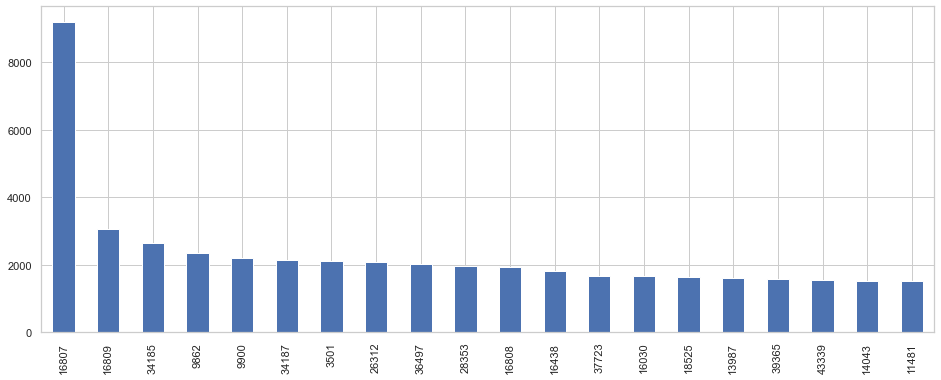

In [101]:
plt.subplots(figsize=(16,6))
prod.view.sort_values(ascending = False)[0:20].plot.bar();

We could possibly increase sales and average ticket by simply highlighting these products in the store.

As long as they are not only seen but also sold.

### Are there products desired but not purchased?

For example, products that many customers look at but do not buy.

If we were to find them, we would have to review what happens to them.

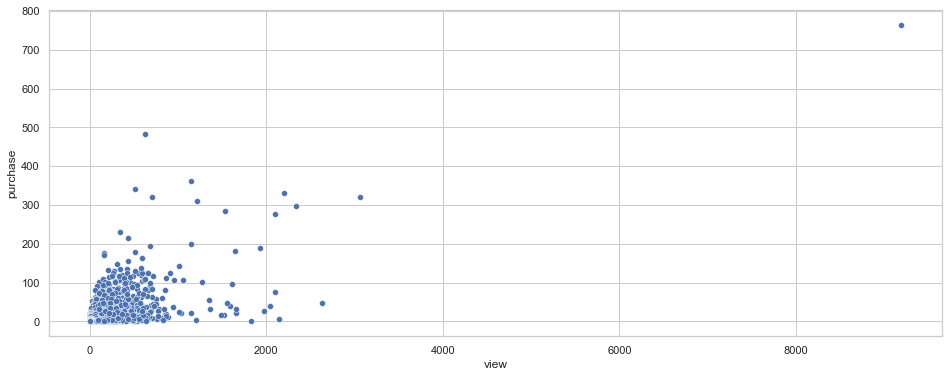

In [102]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod, x = 'view', y = 'purchase');

Removing outlier and zooming in the window of many views few purchases.

(0.0, 150.0)

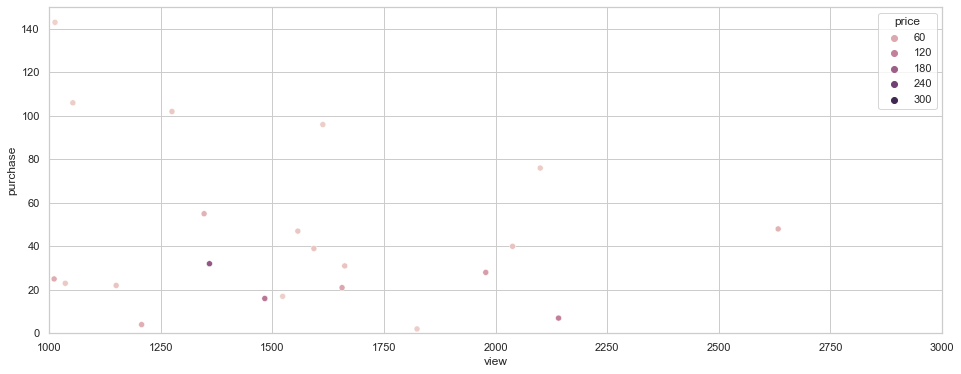

In [104]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod.loc[prod.view < 4000], x = 'view', y = 'purchase', hue = 'price')
plt.xlim(1000,3000)
plt.ylim(0,150)

There is an opportunity with these products, because for some reason they generate the interest of customers, but in the end they do not buy them.

It would be necessary to make an analysis of them.

### Building a recommendation system

One of the assets that can most increase the sales of an ecommerce is a recommendation system.

A basic one could already be implemented with the most viewed and best seller analysis done previously.

But the real power comes when you create a recommender that personalizes for each purchase.

Types of recommender systems:

* Collaborative filtering:
    * Item-based.
    * User-based.
* Content-based.

In our case we will develop one with collaborative filtering based on items.

Methodology:

Create the dataframe with the kpi of interest 2.
2. Reduce the dimension (optional)
3. Select a distance metric
4. Calculate the item-item matrix
5. Create the prioritization logic

#### Create the dataframe with the kpi of interest

In this case, what is known as an implicit kpi will be used, which will be the number of times the products have been purchased by the same user.

Explicit kpis would be, for example, stars or ratings from 1 to 10.

Since this is a time-consuming algorithm, the problem will be reduced and calculated only for the 100 best-selling products.

The process will be developed manually, however, there are already pre-built packages that are more optimized in terms of performance.

First a master will be calculated with the 100 best selling products.

In [106]:
mas_vendidos = prod.sort_values('purchase', ascending = False).product_id[0:100]
mas_vendidos

16807    5809910
28178    5854897
6644     5700037
314         5304
9900     5751422
          ...   
30395    5862564
9778     5749720
9732     5749149
22751    5835859
22116    5833335
Name: product_id, Length: 100, dtype: int64

Creation of temporary dataframe filtering by these products.

In [108]:
temp = df.loc[df.product_id.isin(mas_vendidos)]
temp

,user_id,user_session,category_id,date,product_id,price,event_type,year,month,day,hour,minute,second,festivo,black_friday,san_valentin
event_time,,,,,,,,,,,,,,,,
2019-10-01 00:26:49,536128518,a31f0991-645e-4472-a012-95eb2f814568,1487580006317032337,2019-10-01,5815662,0.92,purchase,2019,10,1,0,26,49,0,0,0
2019-10-01 00:46:20,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1602943681873052386,2019-10-01,5809912,5.24,view,2019,10,1,0,46,20,0,0,0
2019-10-01 00:48:13,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1602943681873052386,2019-10-01,5816170,5.24,view,2019,10,1,0,48,13,0,0,0
2019-10-01 00:52:39,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1487580005092295511,2019-10-01,5815730,10.95,view,2019,10,1,0,52,39,0,0,0
2019-10-01 01:33:26,555456891,b3239dc3-f107-4034-a507-4c41f646e38a,1487580005092295511,2019-10-01,5849033,10.32,view,2019,10,1,1,33,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:11:44,615102046,17b94398-0397-4c59-bc84-fe91dde0a8ec,1487580006509970331,2020-02-29,5793703,2.22,cart,2020,2,29,23,11,44,0,0,0
2020-02-29 23:12:40,615102046,17b94398-0397-4c59-bc84-fe91dde0a8ec,2195085255034011676,2020-02-29,5550302,1.21,cart,2020,2,29,23,12,40,0,0,0
2020-02-29 23:12:50,599909613,1c6c708d-135d-487b-afa9-4bbcfd28db4d,1602943681873052386,2020-02-29,5809911,5.24,cart,2020,2,29,23,12,50,0,0,0


Creation of the user-item matrix.

In [109]:
usuario_item = temp.loc[temp.event_type == 'purchase'].groupby(['user_session','product_id']).size().unstack(level = 1).fillna(0)
usuario_item

product_id,4497,4600,4768,4938,4958,5013,5304,5526,5528034,5528035,...,5848909,5849033,5854812,5854897,5855332,5857007,5857360,5862564,5862943,5889300
user_session,,,,,,,,,,,,,,,,,,,,,
000a873b-1cc8-4021-91c5-e909cad0311c,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
000c99e6-c5b1-4369-a579-48a53abef301,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0013b593-e8eb-4bcf-b117-441db7cd9c6d,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
003a3517-0c5a-41fb-8a5b-84a20f9e271e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
003b0407-9189-4e02-8c33-08a1b5456df2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffcdfd95-2deb-446f-89c0-ad72d53e3b33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ffdb9d84-26cd-81ed-4470-d48412ff4643,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ffe56b9e-b85a-4efb-8e10-0cac1bef4d29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Reduce dimension (optional)

The resulting matrix is a sparse matrix.

Possibly it would be convenient to reduce the dimension with techniques such as SVD.

For now we continue without doing the reduction.

#### Select a distance metric

Most common metrics:

* Euclidean distance
* Correlation
* Cosine

In this case we have selected the Euclidean distance.

It is operationalized using the spatial.distance.euclidean function of the Scipy package.

In [110]:
from scipy import spatial

#### Calculate the item-item matrix

Creation of the recommender that takes as input a user-item matrix and returns an item-item matrix with the Euclidean distance as data.

In [111]:
def recomendador(dataframe):

    def distancia(product_id):
        return(dataframe.apply(lambda x: spatial.distance.euclidean(x,product_id)))

    return(dataframe.apply(lambda x: distancia(x)))

In [112]:
item_item = recomendador(usuario_item)
item_item

product_id,4497,4600,4768,4938,4958,5013,5304,5526,5528034,5528035,...,5848909,5849033,5854812,5854897,5855332,5857007,5857360,5862564,5862943,5889300
product_id,,,,,,,,,,,,,,,,,,,,,
4497,0.00,14.35,14.42,15.30,15.59,17.18,23.09,14.42,15.26,18.17,...,15.39,20.15,14.42,24.39,14.49,14.73,15.26,14.28,15.97,14.93
4600,14.35,0.00,10.30,14.14,14.18,16.16,22.38,13.19,13.82,17.20,...,13.96,19.24,12.96,23.81,13.04,13.30,14.18,13.04,14.66,13.45
4768,14.42,10.30,0.00,14.14,14.32,16.03,22.34,13.19,13.89,17.26,...,13.96,19.34,12.88,23.73,12.96,13.60,14.11,13.04,14.66,13.67
4938,15.30,14.14,14.14,0.00,15.33,15.72,22.61,14.14,14.80,17.94,...,15.00,19.85,14.00,23.98,13.93,14.46,15.07,14.07,15.52,14.66
4958,15.59,14.18,14.32,15.33,0.00,17.26,22.09,14.53,14.97,18.08,...,15.23,19.97,14.25,24.25,14.25,14.70,15.36,14.39,15.87,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857007,14.73,13.30,13.60,14.46,14.70,16.43,22.36,13.75,14.35,17.64,...,14.28,19.52,13.45,23.66,13.53,0.00,14.56,13.67,15.03,14.07
5857360,15.26,14.18,14.11,15.07,15.36,15.68,22.85,14.32,14.97,18.03,...,14.97,19.72,14.18,24.00,14.18,14.56,0.00,13.23,15.62,14.70
5862564,14.28,13.04,13.04,14.07,14.39,14.93,22.16,13.34,13.89,17.03,...,14.11,18.97,13.04,23.26,13.04,13.67,13.23,0.00,14.73,13.67


#### Create the prioritization logic

The recommender is already developed.

This table should be called every time a user looks at a product or puts it in the cart.

To be more effective you could use all the accumulated information of the session or even of the whole user if he is logged in.

That means that you need a system to recommend products whether the input is for a single product or several products.

And at the same time return several recommendations, to cover all the "gaps" of recommendation that the customer's website may have.

We will implement a very simple algorithm that will:

1. Create an array with the input products to extract their vectors from the item-item array.
2. Calculate the sum of distances of all the products.
3. Remove themselves so as not to self-recommend.
4. Return the 10 with the smallest distance.

In [115]:
#In the case of multiple products it will come from the web server as a semicolon separated string.
def priorizador(products,returns = 10):
    #create array with input products.
    array = np.int64(products.split(';'))
    
    #extract its vectors from total array
    matriz = item_item[array]
    
    #calculate sum of distances
    suma_distancias = matriz.agg(sum,axis = 1)
    
    #eliminate input products
    suma_distancias = suma_distancias.loc[~suma_distancias.index.isin(list(array))]
    
    #return the 10 with smallest distance
    return(suma_distancias.sort_values()[0:returns])

Checking a product:

In [116]:
priorizador('4497')

product_id
5749720             14.14
5724230             14.25
5749149             14.28
5862564             14.28
5550302             14.28
5824810             14.28
5809303             14.32
5833335             14.32
5835859             14.35
5833318             14.35
dtype: float64

Comprobación varios productos:

In [117]:
priorizador('4497;4600;4768')

product_id
5749149             39.42
5833318             39.81
5809303             39.85
5833335             39.85
5835859             40.20
5824810             40.21
5749720             40.22
5724230             40.25
5854812             40.27
5585658             40.31
dtype: float64

# CONCLUSIONS

The current trend is flat in all metrics, which confirms the need for CRO actions.

Following the analysis of transactional data, a CRO plan has been developed with 12 specific initiatives organized into 5 major business levers that are highly likely to increase the baselines and achieve an overall increase in ecommerce revenues.

## Baseline

In each session, on average:

* KPIs per session: 2.2 products are viewed.
* KPIs per session: 1.3 products added to the cart
* KPIs per session: 0.9 products removed from cart
* KPIs per session: 0.3 products are purchased
* Cross-sell: median of 5 products per purchase
* Recurrence: 10% of customers return to purchase after the first month
* Conversion: 60% of add to cart on views
* Conversion: 22% of purchases over adds to cart
* Conversion: 13% of purchases over views
* Average monthly turnover: 125.000€.

## Acciones de incremento de visualizaciones

1. Revise paid campaigns (generation and retargeting) to concentrate investment in slots between 9 am and 1 pm and between 6 pm and 8 pm.
2. Concentrate Christmas and post-Christmas investment in the week of black friday.
3. Increase the investment until reaching the maximum CPA based on the LTV we have identified.

## Acciones de incremento de conversión

4. Preconfigure the home page with the products identified in the most viewed and most sold analysis.
5. Work on products with high cart abandonment rate.
6. Work on the products most viewed but little purchased and on the products most purchased but little viewed.

## Acciones de incremento de venta cruzada

7. The medium purchase includes 5 products
8. Increase this ratio through real time recommendation with the new recommender.

## Acciones de incremento de frecuencia de compra

9. 90% of customers make only one purchase
10. Create a periodic newsletter with the new recommender to increase the frequency of visits.
11. Promotional campaigns on the top segments of the RFM segmentation.

## Acciones de fidelización de clientes

12. Create a loyalty program segmented by the new RFM segmentation.